In [6]:
import os
import pandas as pd
import json

import model_funcs
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cpu")
torch.set_default_dtype(torch.float64)

MODELS_DIR = '/scratch/ci411/sonos_rirs/models/early_runs'
FEATURES_DIR = '/scratch/ci411/sonos_rirs/features/'

In [2]:
#load featuresets and build dataloader for test evaluation
baseline_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_baseline','feature_df.csv'))
prop1_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop1','feature_df.csv'))
prop2_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop2','feature_df.csv'))
prop3_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop3','feature_df.csv'))
prop4_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop4','feature_df.csv'))

baseline_dl = model_funcs.create_dataloader(baseline_df[baseline_df['split']=='test'])
prop1_dl = model_funcs.create_dataloader(prop1_df[prop1_df['split']=='test'])
prop2_dl = model_funcs.create_dataloader(prop2_df[prop1_df['split']=='test'])
prop3_dl = model_funcs.create_dataloader(prop3_df[prop1_df['split']=='test'])
prop4_dl = model_funcs.create_dataloader(prop4_df[prop1_df['split']=='test'])


name: 080522_prop0nl 
notes: mag + 5 lf features 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_baseline/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080522_prop0nl 
1000 epochs completed
Current results:
duration: 	 18.770040035247803
train_loss: 	 2822889.6124862595
val_loss: 	 3166228.3527194783
val_bias: 	 -32.210391802148344
val_pearson_cor: 	 0.9057144028226253
val_mean_mult: 	 nan
val_var_ratio: 	 0.806261069841528

Test Results:
mse: 	 4.6754e+06
bias: 	 8.6534e+02
pearson_cor: 	 3.6126e-01
mean_mult: 	 inf
var_ratio: 	 2.9532e+03


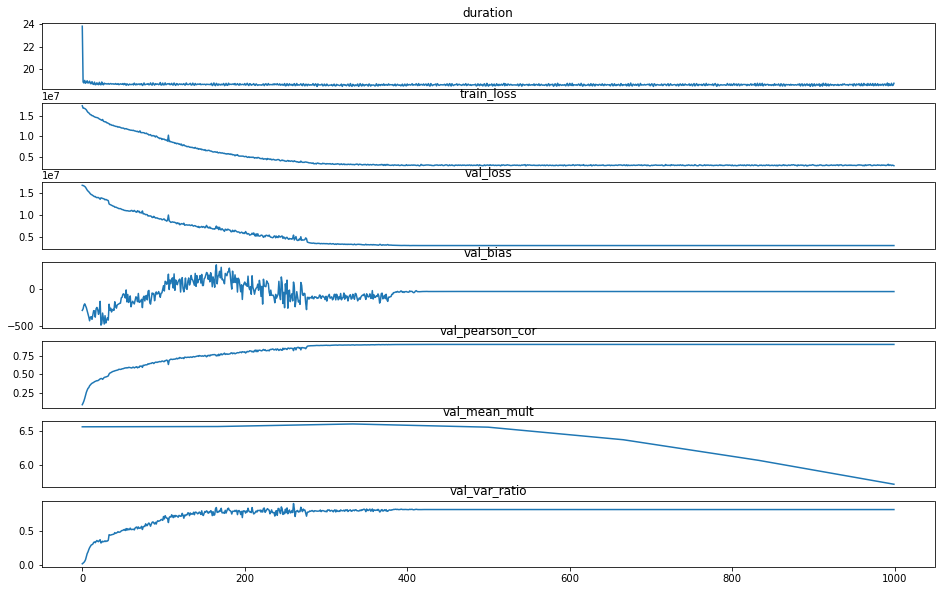

In [23]:
model_name = "080522_prop0nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print("Current results:")
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

json_metric = os.path.join(MODELS_DIR, model_name, 'test_metrics.json')
if os.path.exists(json_metric):
    print('\nTest Results:')
    with open(json_metric) as f:
        metrics = json.load(f)
    for key in list(metrics.keys()):
        print('{}: \t {:.4e}'.format(key, metrics[key]))
else:
    print("\nNo test result found")

name: 080522_prop1nl 
notes: phase + 5 lf features 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop1/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080522_prop1nl 
1000 epochs completed
Current results:
duration: 	 67.80595374107361
train_loss: 	 13717764.558455467
val_loss: 	 14639629.517140005
val_bias: 	 93.39747634824532
val_pearson_cor: 	 0.3417259959709492
val_mean_mult: 	 nan
val_var_ratio: 	 0.3841805633028318

Test Results:
mse: 	 3.5398e+06
bias: 	 1.4812e+03
pearson_cor: 	 -1.4864e-01
mean_mult: 	 nan
var_ratio: 	 2.3875e+00


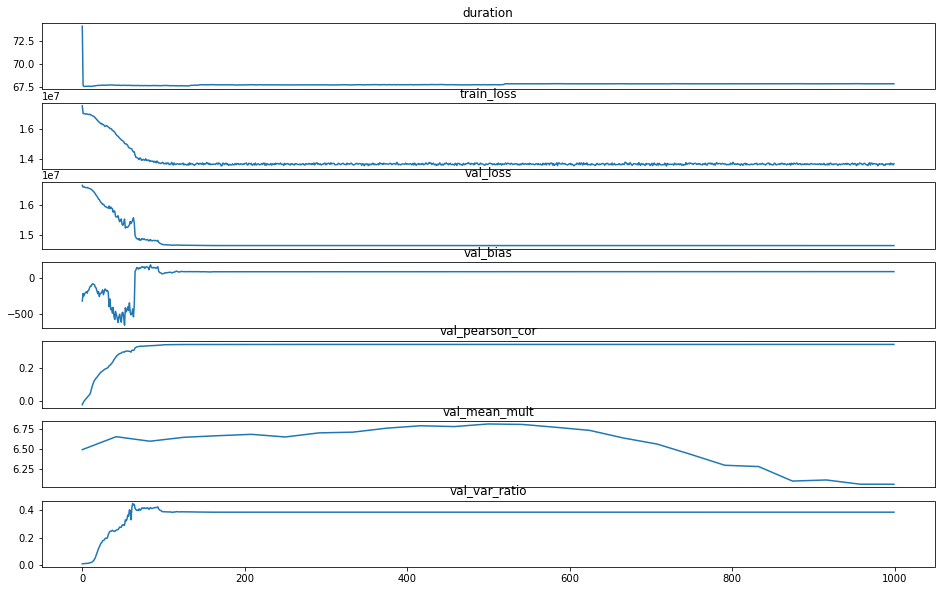

In [24]:
model_name = "080522_prop1nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])
        
json_metric = os.path.join(MODELS_DIR, model_name, 'test_metrics.json')
if os.path.exists(json_metric):
    print('\nTest Results:')
    with open(json_metric) as f:
        metrics = json.load(f)
    for key in list(metrics.keys()):
        print('{}: \t {:.4e}'.format(key, metrics[key]))
else:
    print("\nNo test result found")

name: 080522_prop2nl 
notes: phase + 1st deriv lf 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop2/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080522_prop2nl 
1000 epochs completed
Current results:
duration: 	 69.73898243904114
train_loss: 	 12863589.308043895
val_loss: 	 11457300.635000998
val_bias: 	 -20.542079584122725
val_pearson_cor: 	 0.5260438456643605
val_mean_mult: 	 nan
val_var_ratio: 	 0.4527279545115894

Test Results:
mse: 	 3.0927e+06
bias: 	 1.2452e+03
pearson_cor: 	 -4.6188e-02
mean_mult: 	 nan
var_ratio: 	 2.6914e+00


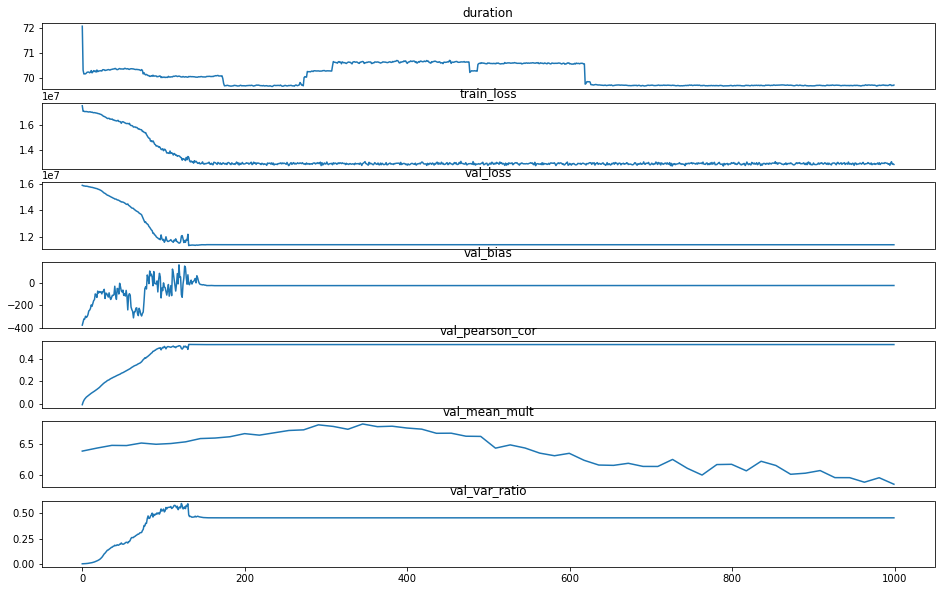

In [25]:
model_name = "080522_prop2nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])
        
json_metric = os.path.join(MODELS_DIR, model_name, 'test_metrics.json')
if os.path.exists(json_metric):
    print('\nTest Results:')
    with open(json_metric) as f:
        metrics = json.load(f)
    for key in list(metrics.keys()):
        print('{}: \t {:.4e}'.format(key, metrics[key]))
else:
    print("\nNo test result found")

name: 080522_prop3nl 
notes: mag+ lf phase + lf 1st deriv 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop3/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080522_prop3nl 
1000 epochs completed
Current results:
duration: 	 83.1523323059082
train_loss: 	 5277871.62519413
val_loss: 	 5367781.5105895
val_bias: 	 -26.765274390258096
val_pearson_cor: 	 0.8229009370523385
val_mean_mult: 	 nan
val_var_ratio: 	 0.746190278552407

Test Results:
mse: 	 1.9108e+06
bias: 	 2.4202e+02
pearson_cor: 	 2.6784e-01
mean_mult: 	 nan
var_ratio: 	 3.3126e+00


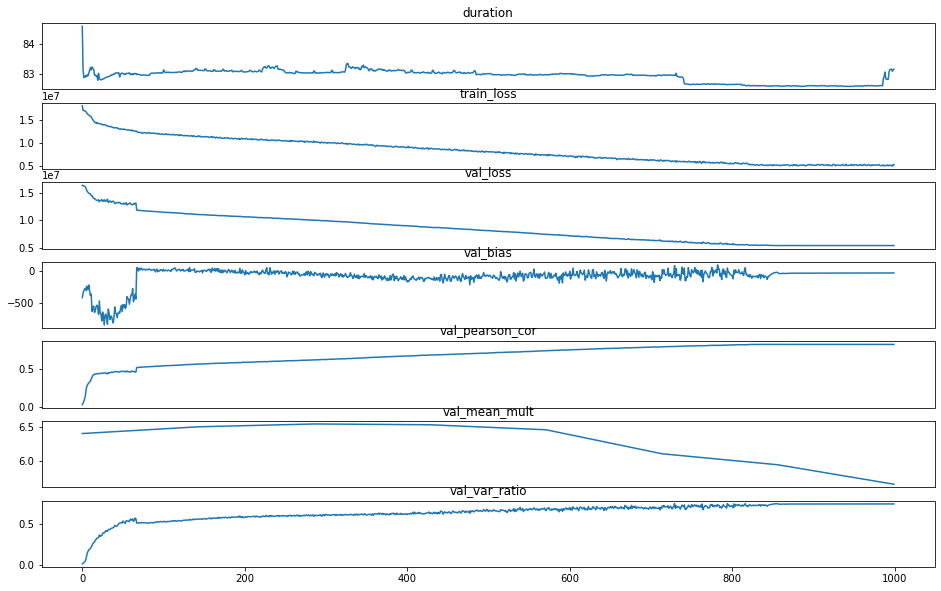

In [26]:
model_name = "080522_prop3nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])
        
json_metric = os.path.join(MODELS_DIR, model_name, 'test_metrics.json')
if os.path.exists(json_metric):
    print('\nTest Results:')
    with open(json_metric) as f:
        metrics = json.load(f)
    for key in list(metrics.keys()):
        print('{}: \t {:.4e}'.format(key, metrics[key]))
else:
    print("\nNo test result found")

name: 080522_prop4nl 
notes: mag+ lf phase + lf 5 feats 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop4/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080522_prop4nl 
1000 epochs completed
Current results:
duration: 	 81.55692887306213
train_loss: 	 3997214.72066267
val_loss: 	 4481222.6555684125
val_bias: 	 -41.76334869456942
val_pearson_cor: 	 0.8541691299721395
val_mean_mult: 	 nan
val_var_ratio: 	 0.7498411481278457

Test Results:
mse: 	 4.3836e+06
bias: 	 9.7452e+02
pearson_cor: 	 5.2075e-01
mean_mult: 	 nan
var_ratio: 	 4.7844e+00


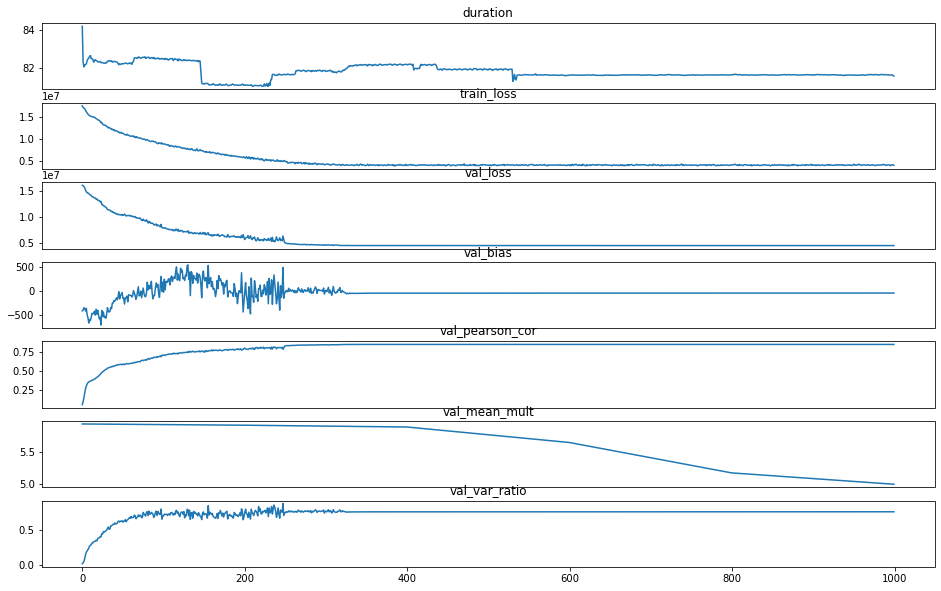

In [27]:
model_name = "080522_prop4nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])
        
json_metric = os.path.join(MODELS_DIR, model_name, 'test_metrics.json')
if os.path.exists(json_metric):
    print('\nTest Results:')
    with open(json_metric) as f:
        metrics = json.load(f)
    for key in list(metrics.keys()):
        print('{}: \t {:.4e}'.format(key, metrics[key]))
else:
    print("\nNo test result found")

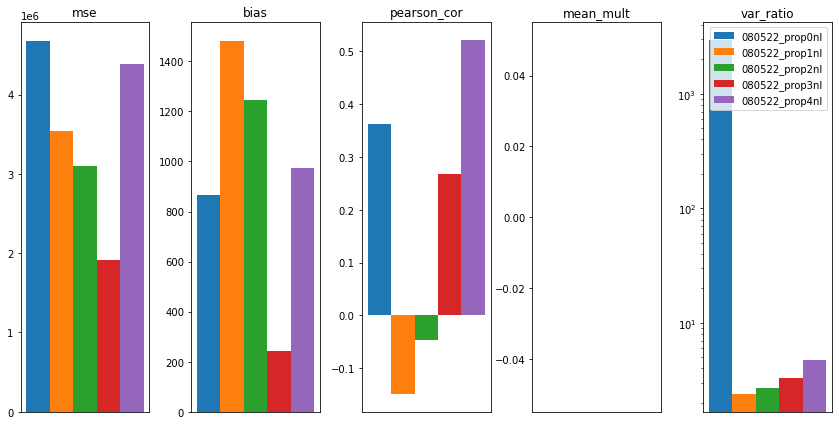

In [22]:
model_base = "080522_prop{}nl"
model_names = []
metric_lists = []
for i in range(5):
    model_name = model_base.format(i)  
    model_names.append(model_name)
    json_metric = os.path.join(MODELS_DIR, model_name, 'test_metrics.json')    
    with open(json_metric) as f:
        metrics = json.load(f)
    metric_list = []
    key_names = []
    for key in list(metrics.keys()):
        metric_list.append(metrics[key])
        key_names.append(key)
    metric_lists.append(metric_list)
    
    
fig, axs = plt.subplots(1,5, figsize=(12,6))
fig.tight_layout()

n = len(model_names)
width = 0.5/n
for i, name in enumerate(model_names):
    metrics = metric_lists[i]
    offset = i/(2*n) - 0.25
    for j, metric in enumerate(metrics):
        axs[j].bar(offset, metric, width, label=name)
        axs[j].set_title(key_names[j])
        axs[j].set_xticks([])
plt.legend()

axs[4].set_yscale('log')


In [46]:
MODELS_DIR = '/scratch/ci411/sonos_rirs/models/'

def plot_experiment_metrics(experiment_name):
    experiment_dir = os.path.join(MODELS_DIR, experiment_name)
    model_names = os.listdir(experiment_dir)
    model_names.sort()
            
    n = len(model_names)
    width = 0.5/n
    
    fig, axs = plt.subplots(1,5, figsize=(12,6))
    fig.tight_layout()

    for i, model in enumerate(model_names):
        json_metric = os.path.join(experiment_dir, model, 'test_metrics.json')
        if os.path.exists(json_metric):
            with open(json_metric) as f:
                metric_dict = json.load(f)
        else:
            print("No metric file at {}".format(json_metric))
            continue
        
        offset = i/(2*n) - 0.25
        for j, (key, val) in enumerate(metric_dict.items()):
            axs[j].bar(offset, val, width, label=model)
            axs[j].set_title(key)
            axs[j].set_xticks([])
    plt.legend()


No metric file at /scratch/ci411/sonos_rirs/models/bl_l2_reg/bl_l22/test_metrics.json
No metric file at /scratch/ci411/sonos_rirs/models/bl_l2_reg/bl_l23/test_metrics.json
No metric file at /scratch/ci411/sonos_rirs/models/bl_l2_reg/bl_l25/test_metrics.json


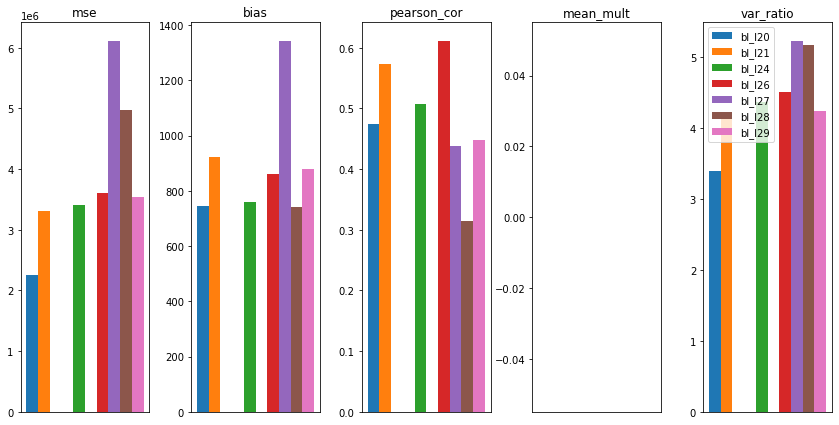

In [47]:
plot_experiment_metrics('bl_l2_reg')

No metric file at /scratch/ci411/sonos_rirs/models/bl_batch_size/bl_bs6/test_metrics.json


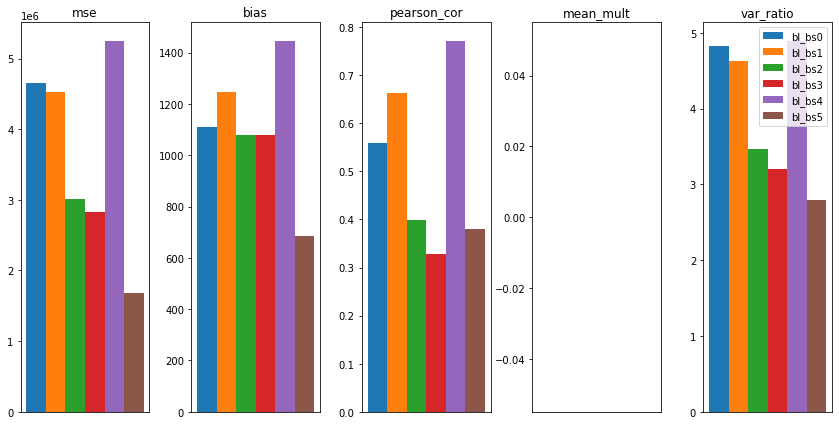

In [49]:
plot_experiment_metrics('bl_batch_size')

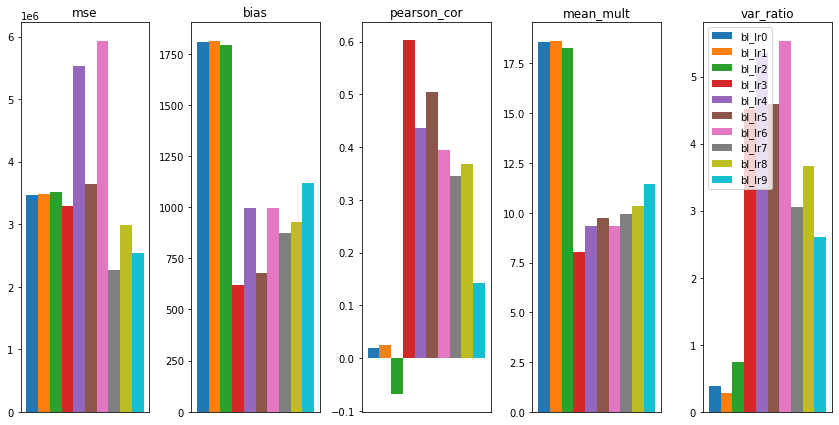

In [52]:
plot_experiment_metrics('bl_learning_rate')

No metric file at /scratch/ci411/sonos_rirs/models/bl_sched_thres/bl_st4/test_metrics.json


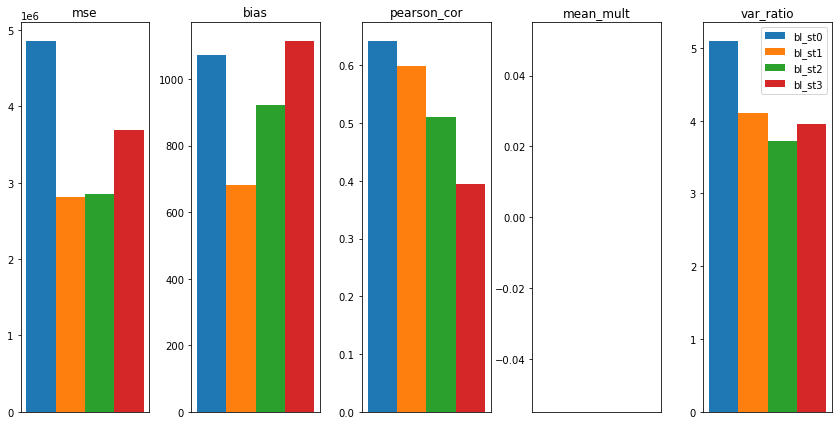

In [51]:
plot_experiment_metrics('bl_sched_thres')